<a href="https://colab.research.google.com/github/aidtaleb/data/blob/master/data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import common libraries
from __future__ import print_function
import pandas as pd 
import boto3
import numpy as np


%matplotlib inline

import sys
from urllib.request import urlretrieve
import zipfile
from dateutil.parser import parse
import json
from random import shuffle
import random
import datetime
import os

import boto3
import s3fs
import sagemaker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import IntSlider, FloatSlider, Checkbox

In [ ]:
import json
from pathlib import Path
with open(Path('~/aws-cred.json').expanduser()) as json_data_file:
            config = json.load(json_data_file)
import boto3
session = boto3.Session(aws_access_key_id=config["ACCESS_KEY_ID"], aws_secret_access_key=config["SECRET_ACCESS_KEY"], region_name='eu-west-1')

In [ ]:
# set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

In [ ]:
sagemaker_session = sagemaker.Session()

In [ ]:
s3_bucket = sagemaker.Session().default_bucket()  # replace with an existing bucket if needed
s3_prefix = 'forcasting-greenhouse-rate'    # prefix used for all data stored within the bucket

role = sagemaker.get_execution_role()             # IAM role to use by SageMaker

In [ ]:
region = sagemaker_session.boto_region_name

s3_data_path = "s3://{}/{}/data".format(s3_bucket, s3_prefix)
s3_output_path = "s3://{}/{}/output".format(s3_bucket, s3_prefix)


In [ ]:
s3_data_path

's3://sagemaker-eu-west-3-444852792677/forcasting-greenhouse-rate/data'

In [ ]:
image_name = sagemaker.amazon.amazon_estimator.get_image_uri(region, "forecasting-deepar", "latest")

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


In [ ]:
s3 = session.resource("s3")
dos='s3://myprojectjedha/AirQualityUCI.csv'


In [ ]:
datp=pd.read_csv(dos, delimiter=";")


In [ ]:
datp.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
datp['Time']=datp['Time'].str.replace(".",':')

In [ ]:
datp['Time']= datp["Date"] + " " +datp['Time']

In [ ]:
datp.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,10/03/2004 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,10/03/2004 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,10/03/2004 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,10/03/2004 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,10/03/2004 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
from datetime import datetime
#datp['Time'] =datp['Time'].apply(pd.to_datetime )
datp['Time'] =pd.to_datetime(datp.Time)
dataset=datp[['Time','PT08.S1(CO)','C6H6(GT)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','NO2(GT)','PT08.S5(O3)','PT08.S4(NO2)','PT08.S3(NOx)']]
dataset=dataset.set_index('Time')
dataset.head()

,PT08.S1(CO),C6H6(GT),NMHC(GT),PT08.S2(NMHC),NOx(GT),NO2(GT),PT08.S5(O3),PT08.S4(NO2),PT08.S3(NOx)
Time,,,,,,,,,
2004-10-03 18:00:00,1360.0,"11,9",150.0,1046.0,166.0,113.0,1268.0,1692.0,1056.0
2004-10-03 19:00:00,1292.0,"9,4",112.0,955.0,103.0,92.0,972.0,1559.0,1174.0
2004-10-03 20:00:00,1402.0,"9,0",88.0,939.0,131.0,114.0,1074.0,1555.0,1140.0
2004-10-03 21:00:00,1376.0,"9,2",80.0,948.0,172.0,122.0,1203.0,1584.0,1092.0
2004-10-03 22:00:00,1272.0,"6,5",51.0,836.0,131.0,116.0,1110.0,1490.0,1205.0


In [ ]:
dataset= dataset.dropna()

In [ ]:
dataset.index.name=None

In [ ]:
 dataset.head()

,PT08.S1(CO),C6H6(GT),NMHC(GT),PT08.S2(NMHC),NOx(GT),NO2(GT),PT08.S5(O3),PT08.S4(NO2),PT08.S3(NOx)
2004-10-03 18:00:00,1360.0,"11,9",150.0,1046.0,166.0,113.0,1268.0,1692.0,1056.0
2004-10-03 19:00:00,1292.0,"9,4",112.0,955.0,103.0,92.0,972.0,1559.0,1174.0
2004-10-03 20:00:00,1402.0,"9,0",88.0,939.0,131.0,114.0,1074.0,1555.0,1140.0
2004-10-03 21:00:00,1376.0,"9,2",80.0,948.0,172.0,122.0,1203.0,1584.0,1092.0
2004-10-03 22:00:00,1272.0,"6,5",51.0,836.0,131.0,116.0,1110.0,1490.0,1205.0


In [ ]:
data_kw = dataset.resample('2H').sum() /8
data_kw.iloc[:,1]


2004-01-04 00:00:00     25.750
2004-01-04 02:00:00     17.875
2004-01-04 04:00:00     11.125
2004-01-04 06:00:00     79.875
2004-01-04 08:00:00    222.375
                        ...   
2005-12-03 14:00:00    -50.000
2005-12-03 16:00:00    -50.000
2005-12-03 18:00:00    -50.000
2005-12-03 20:00:00    -50.000
2005-12-03 22:00:00    -50.000
Freq: 2H, Name: NMHC(GT), Length: 8400, dtype: float64

In [ ]:
num_timeseries = dataset.shape[1]-1
data_kw = dataset.resample('2H').sum() / 8
timeseries = []
for i in range(num_timeseries):
    timeseries.append(np.trim_zeros(data_kw.iloc[:,i], trim='f'))

In [ ]:
len(timeseries[1])

8400

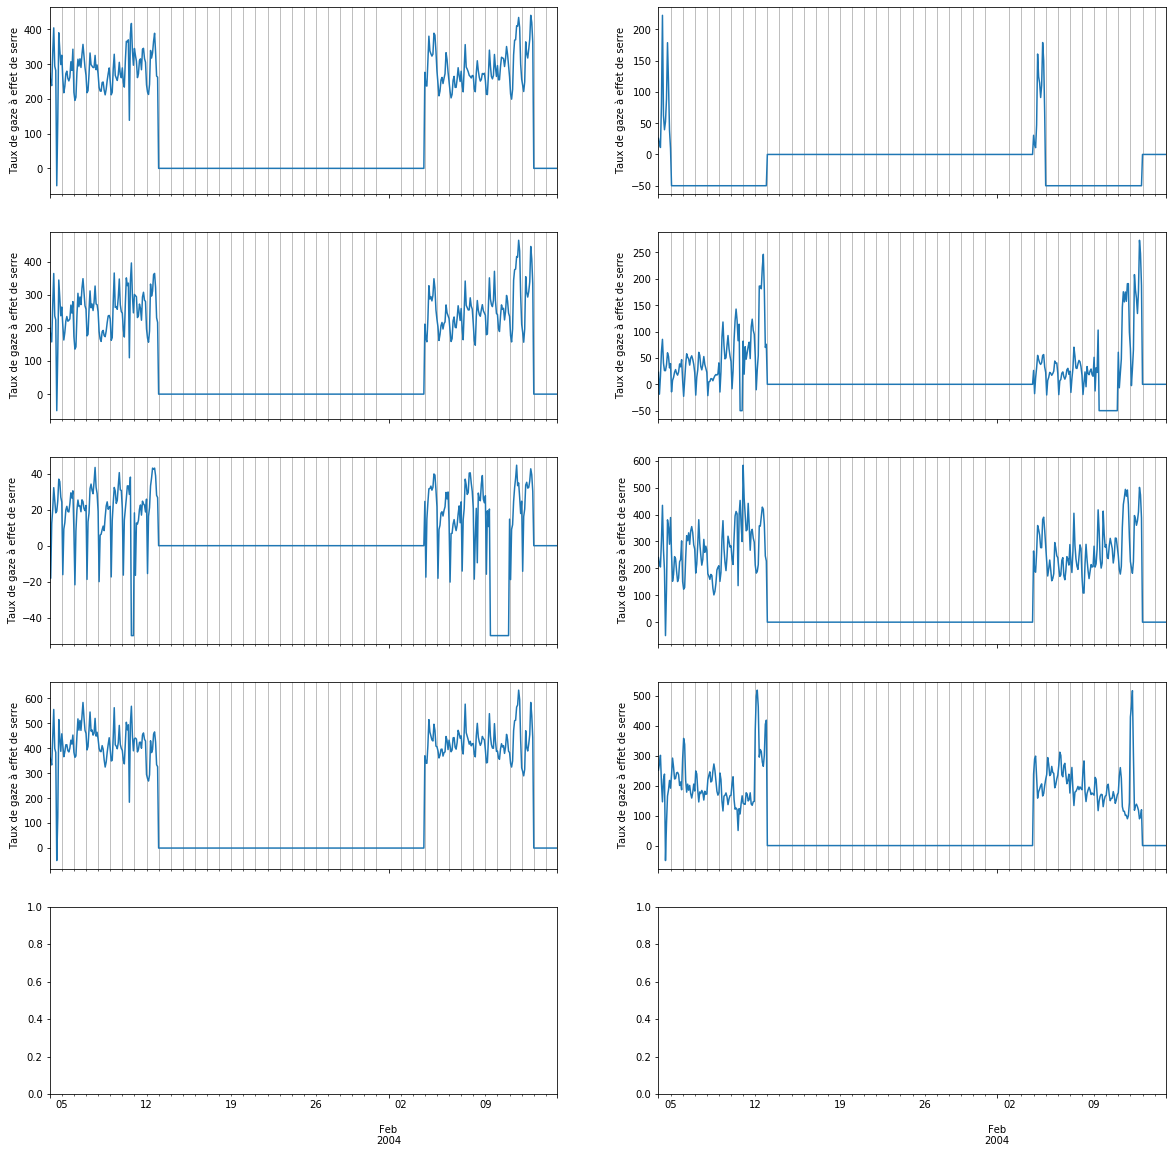

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(0, 8):
    timeseries[i].loc["2004-01-04":"2004-02-14"].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("Taux de gaze à effet de serre")   
    axx[i].grid(which='minor', axis='x')

In [ ]:
len(timeseries[4])


8400

In [ ]:
# we use 2 hour frequency for the time series
freq = '2H'

# we predict for 1 days
prediction_length = 1* 12

# we also use 1 days as context length, this is the number of state updates accomplished before making predictions
context_length = 1 * 12

In [ ]:
start_dataset = pd.Timestamp("2004-01-01 00:00:00", freq=freq)
end_training = pd.Timestamp("2004-02-25 00:00:00", freq=freq)
start_dataset

Timestamp('2004-01-01 00:00:00', freq='2H')

In [ ]:
for ts in timeseries:
    print( ts.index[-1] )


2005-12-03 22:00:00
2005-12-03 22:00:00
2005-12-03 22:00:00
2005-12-03 22:00:00
2005-12-03 22:00:00
2005-12-03 22:00:00
2005-12-03 22:00:00
2005-12-03 22:00:00


In [ ]:
training_data = [
    {
        "start": str(start_dataset),
        "target": ts[start_dataset:end_training - timedelta(days=1)].tolist()  # We use -1, because pandas indexing includes the upper bound 
    }
    for ts in timeseries
]
print(len(training_data))
len(training_data[1]['target'])

8


613

In [ ]:
num_test_windows = 4

test_data = [
    {
        "start": str(start_dataset),
        "target": ts[start_dataset:end_training + timedelta(days=k * prediction_length)].tolist()
    }
    for k in range(1, num_test_windows + 1) 
    for ts in timeseries
]
print(len(test_data))

32


In [ ]:
def write_dicts_to_file(path, data):
    with open(path, 'wb') as fp:
        for d in data:
            fp.write(json.dumps(d).encode("utf-8"))
            fp.write("\n".encode('utf-8'))

In [ ]:
%%time
write_dicts_to_file("train.json", training_data)
write_dicts_to_file("test.json", test_data)

CPU times: user 11.8 ms, sys: 0 ns, total: 11.8 ms
Wall time: 11.2 ms


In [ ]:
s3 = boto3.resource('s3')
def copy_to_s3(local_file, s3_path, override=False):
    assert s3_path.startswith('s3://')
    split = s3_path.split('/')
    bucket = split[2]
    path = '/'.join(split[3:])
    buk = s3.Bucket(bucket)
    
    if len(list(buk.objects.filter(Prefix=path))) > 0:
        if not override:
            print('File s3://{}/{} already exists.\nSet override to upload anyway.\n'.format(s3_bucket, s3_path))
            return
        else:
            print('Overwriting existing file')
    with open(local_file, 'rb') as data:
        print('Uploading file to {}'.format(s3_path))
        buk.put_object(Key=path, Body=data)

In [ ]:
%%time
copy_to_s3("train.json", s3_data_path + "/train/train.json")
copy_to_s3("test.json", s3_data_path + "/test/test.json")

Uploading file to s3://sagemaker-eu-west-3-444852792677/forcasting-greenhouse-rate/data/train/train.json
Uploading file to s3://sagemaker-eu-west-3-444852792677/forcasting-greenhouse-rate/data/test/test.json
CPU times: user 34.1 ms, sys: 23 µs, total: 34.1 ms
Wall time: 191 ms


In [ ]:
s3filesystem = s3fs.S3FileSystem()
with s3filesystem.open(s3_data_path + "/train/train.json", 'rb') as fp:
    print(fp.readline().decode("utf-8")[:100] + "...")

{"start": "2004-01-01 00:00:00", "target": [273.375, 248.75, 238.125, 333.0, 404.25, 294.0, 281.75, ...


In [ ]:
# train the model
estimator = sagemaker.estimator.Estimator(
    sagemaker_session=sagemaker_session,
    image_name=image_name,
    role=role,
    train_instance_count=1,
    train_instance_type='ml.c5.2xlarge',
    base_job_name='forcasting-greenhouse-rate',
    output_path=s3_output_path
)

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


In [ ]:
# set the hyperparameter
hyperparameters = {
    "time_freq": freq,
    "epochs": "400",
    "early_stopping_patience": "40",
    "mini_batch_size": "64",
    "learning_rate": "5E-4",
    "context_length": str(context_length),
    "prediction_length": str(prediction_length)
}

In [ ]:
estimator.set_hyperparameters(**hyperparameters)

In [ ]:
%%time

data_channels = {
    "train": "{}/train/".format(s3_data_path),
    "test": "{}/test/".format(s3_data_path)
}

estimator.fit(inputs=data_channels, wait=True)

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


2020-09-25 10:12:40 Starting - Starting the training job...
2020-09-25 10:12:43 Starting - Launching requested ML instances......
2020-09-25 10:13:48 Starting - Preparing the instances for training...
2020-09-25 10:14:24 Downloading - Downloading input data...
2020-09-25 10:15:06 Training - Training image download completed. Training in progress..Arguments: train
[09/25/2020 10:15:07 INFO 139942184552256] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'auto', u'likelihood': u'student-t', u'early_stopping_patience': u'

In [ ]:
class DeepARPredictor(sagemaker.predictor.RealTimePredictor):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, content_type=sagemaker.content_types.CONTENT_TYPE_JSON, **kwargs)
        
    def predict(self, ts, cat=None, dynamic_feat=None, 
                num_samples=100, return_samples=False, quantiles=["0.1", "0.5", "0.9"]):
    
        prediction_time = ts.index[-1] + datetime.timedelta(days=1)
        quantiles = [str(q) for q in quantiles]
        req = self.__encode_request(ts, cat, dynamic_feat, num_samples, return_samples, quantiles)
        res = super(DeepARPredictor, self).predict(req)
        return self.__decode_response(res, ts.index.freq, prediction_time, return_samples)
    
    def __encode_request(self, ts, cat, dynamic_feat, num_samples, return_samples, quantiles):
        instance = series_to_dict(ts, cat if cat is not None else None, dynamic_feat if dynamic_feat else None)

        configuration = {
            "num_samples": num_samples,
            "output_types": ["quantiles", "samples"] if return_samples else ["quantiles"],
            "quantiles": quantiles
        }
        
        http_request_data = {
            "instances": [instance],
            "configuration": configuration
        }
        
        return json.dumps(http_request_data).encode('utf-8')
    
    def __decode_response(self, response, freq, prediction_time, return_samples):
        # we only sent one time series so we only receive one in return
        # however, if possible one will pass multiple time series as predictions will then be faster
        predictions = json.loads(response.decode('utf-8'))['predictions'][0]
        prediction_length = len(next(iter(predictions['quantiles'].values())))
        prediction_index = pd.DatetimeIndex(start=prediction_time, freq=freq, periods=prediction_length)        
        if return_samples:
            dict_of_samples = {'sample_' + str(i): s for i, s in enumerate(predictions['samples'])}
        else:
            dict_of_samples = {}
        return pd.DataFrame(data={**predictions['quantiles'], **dict_of_samples}, index=prediction_index)

    def set_frequency(self, freq):
        self.freq = freq
        
def encode_target(ts):
    return [x if np.isfinite(x) else "NaN" for x in ts]        

def series_to_dict(ts, cat=None, dynamic_feat=None):
    """Given a pandas.Series object, returns a dictionary encoding the time series.

    ts -- a pands.Series object with the target time series
    cat -- an integer indicating the time series category

    Return value: a dictionary
    """
    obj = {"start": str(ts.index[0]), "target": encode_target(ts)}
    if cat is not None:
        obj["cat"] = cat
    if dynamic_feat is not None:
        obj["dynamic_feat"] = dynamic_feat        
    return obj

In [ ]:
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.c5.2xlarge',
    predictor_cls=DeepARPredictor)

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.
Using already existing model: forcasting-greenhouse-rate-2020-09-25-10-12-40-188


-------------!

In [ ]:
predictor.predict(ts=timeseries[2], quantiles=[0.10, 0.5, 0.90] ).head()


TypeError: __new__() got an unexpected keyword argument 'start'

In [ ]:
ts=timeseries[0]
import datetime

print(ts.index[-1]+ datetime.timedelta(days=1) )

2005-12-04 22:00:00


In [ ]:
def plot(
    predictor, 
    target_ts, 
    cat=None, 
    dynamic_feat=None, 
    forecast_date=end_training, 
    show_samples=False, 
    plot_history=1 * 12,
    confidence=80
):
    print("calling served model to generate predictions starting from {}".format(str(forecast_date)))
    assert(confidence > 50 and confidence < 100)
    low_quantile = 0.5 - confidence * 0.005
    up_quantile = confidence * 0.005 + 0.5
        
    # we first construct the argument to call our model
    args = {
        "ts": target_ts[:forecast_date],
        "return_samples": show_samples,
        "quantiles": [low_quantile, 0.5, up_quantile],
        "num_samples": 100
    }


    if dynamic_feat is not None:
        args["dynamic_feat"] = dynamic_feat
        fig = plt.figure(figsize=(20, 6))
        ax = plt.subplot(2, 1, 1)
    else:
        fig = plt.figure(figsize=(20, 3))
        ax = plt.subplot(1,1,1)
    
    if cat is not None:
        args["cat"] = cat
        ax.text(0.9, 0.9, 'cat = {}'.format(cat), transform=ax.transAxes)

    # call the end point to get the prediction
    prediction = predictor.predict(**args)

    # plot the samples
    if show_samples: 
        for key in prediction.keys():
            if "sample" in key:
                prediction[key].plot(color='lightskyblue', alpha=0.2, label='_nolegend_')
                
                
    # plot the target
    target_section = target_ts[forecast_date-plot_history:forecast_date+prediction_length]
    target_section.plot(color="black", label='target')
    
    # plot the confidence interval and the median predicted
    ax.fill_between(
        prediction[str(low_quantile)].index, 
        prediction[str(low_quantile)].values, 
        prediction[str(up_quantile)].values, 
        color="b", alpha=0.3, label='{}% confidence interval'.format(confidence)
    )
    prediction["0.5"].plot(color="b", label='P50')
    ax.legend(loc=2)    
    
    # fix the scale as the samples may change it
    ax.set_ylim(target_section.min() * 0.5, target_section.max() * 1.5)
    
    if dynamic_feat is not None:
        for i, f in enumerate(dynamic_feat, start=1):
            ax = plt.subplot(len(dynamic_feat) * 2, 1, len(dynamic_feat) + i, sharex=ax)
            feat_ts = pd.Series(
                index=pd.DatetimeIndex(start=target_ts.index[0], freq=target_ts.index.freq, periods=len(f)),
                data=f
            )
            feat_ts[forecast_date-plot_history:forecast_date+prediction_length].plot(ax=ax, color='g')